# Método superpixel: SLIC

Apesar de existir vários algoritmos de superpixel, escolhi o mais simples para começar a pesquisa.

O algoritmo *Simple Linear Iterative Clustering* é uma variação do K-means para um problema de dimensão 5d, com algumas características particulares, para clusterizar uma imagem de maneira não supervisionada agrupando os clusters mais próximos pela métrica do módulo de $|(r, g, b, x, y)|$.
Isto é, o algoritmo tenta agrupar os pixels mais similares em distância e espaço de cor.

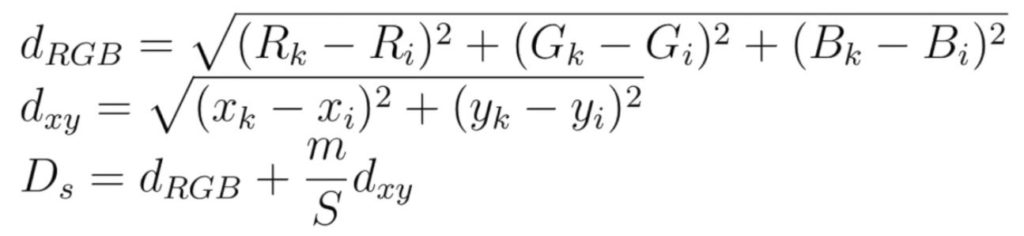

Nessa seção eu gero um exemplo de uso do algoritmo SLIC.

In [27]:
# ref: https://scikit-image.org/docs/stable/auto_examples/segmentation/plot_segmentations.html

import matplotlib.pyplot as plt
import numpy as np

from skimage.data import astronaut, cat, microaneurysms, rocket
from skimage.segmentation import mark_boundaries
from skimage.util import img_as_float
import networkx as nx

from egsis.complex_networks import complex_network_from_segments
from egsis.complex_networks import draw_complex_network
from egsis.superpixels import build_superpixels_from_image
from egsis.superpixels import superpixel_centroids

IMG shape: (300, 451, 3)
SLIC number of segments: 54


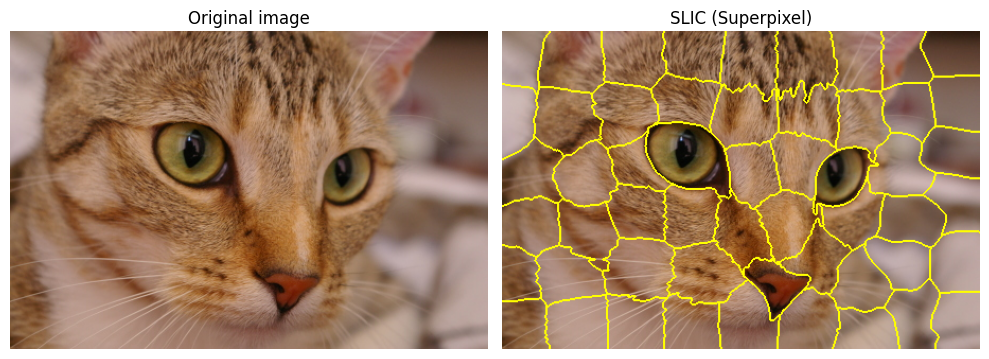

In [28]:
img = img_as_float(cat())

segments_slic = build_superpixels_from_image(
    img, 
    n_segments=50, 
    compactness=40, 
    sigma=0.8,
    start_label=1
)

print(f'IMG shape: {img.shape}')
print(f'SLIC number of segments: {len(np.unique(segments_slic))}')

fig, ax = plt.subplots(1, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0].imshow(img)
ax[0].set_title("Original image")
ax[1].imshow(mark_boundaries(img, segments_slic))
ax[1].set_title('SLIC (Superpixel)')

for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()

# Redes complexas

A partir da segmentação não-supervisionada via superpixel, a próxima etapa é construir uma rede complexa representada pela imagem. Dado um grafo $ G $, o conjunto de vértices são iguais ao número de superpixels e as arestas serão as bordas de cada superpixel, ou seja, os vizinhos de cada superpixel.

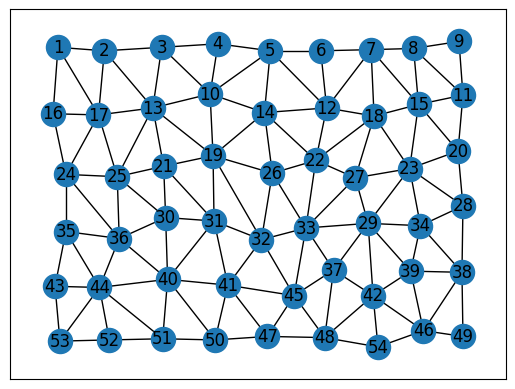

In [29]:
graph = complex_network_from_segments(segments_slic)
nx.draw_networkx(graph, pos=superpixel_centroids(segments_slic))
plt.gca().invert_yaxis()
plt.show()

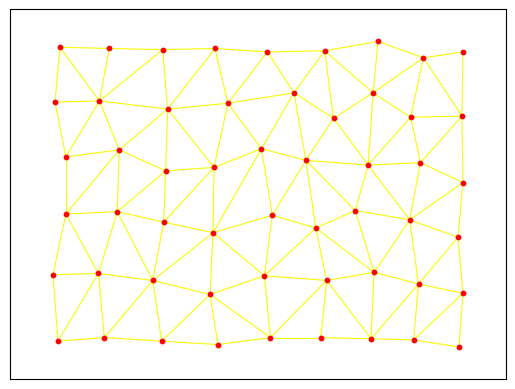

In [30]:
draw_complex_network(graph, segments_slic)
plt.draw()

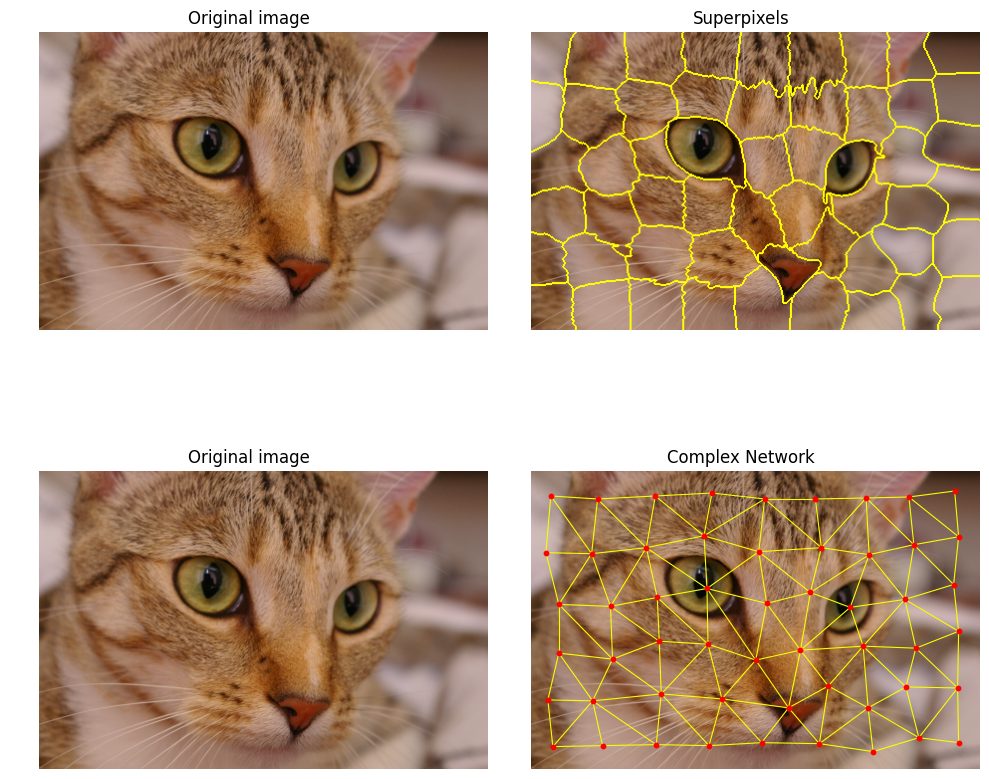

In [31]:

fig, ax = plt.subplots(2, 2, figsize=(10, 10), sharex=True, sharey=True)

ax[0, 0].imshow(img)
ax[0, 0].set_title("Original image")
ax[0, 1].imshow(mark_boundaries(img, segments_slic))
ax[0, 1].set_title("Superpixels")
ax[1, 0].imshow(img)
plt.draw()
ax[1, 0].set_title("Original image")
ax[1, 1].imshow(img)
draw_complex_network(graph, segments_slic, ax[1, 1])
plt.draw()
ax[1, 1].set_title("Complex Network")


for a in ax.ravel():
    a.set_axis_off()

plt.tight_layout()
plt.show()